## 01 Basic DSP Operations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Sampling Rate = 1/0.1 = 10Hz
So theoritically can represent maximum of 10Hz frequency. But in code the wave looks a bit triangular when frequency is near to the limit.

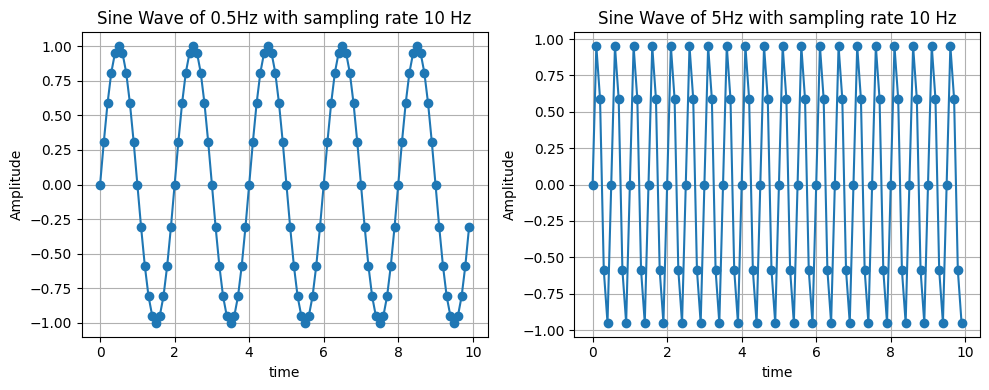

In [28]:
N = 100 #NUmber of samples
Fs1 = 10 #10 Hz sampling frequency
t = np.arange(0,10,1/Fs1)
s1 = np.sin(2*np.pi*0.5*t)
s2 = np.sin(2*np.pi*2*t)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(t,s1,marker='o')
plt.title("Sine Wave of 0.5Hz with sampling rate 10 Hz")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t,s2,marker='o')
plt.title("Sine Wave of 5Hz with sampling rate 10 Hz")
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

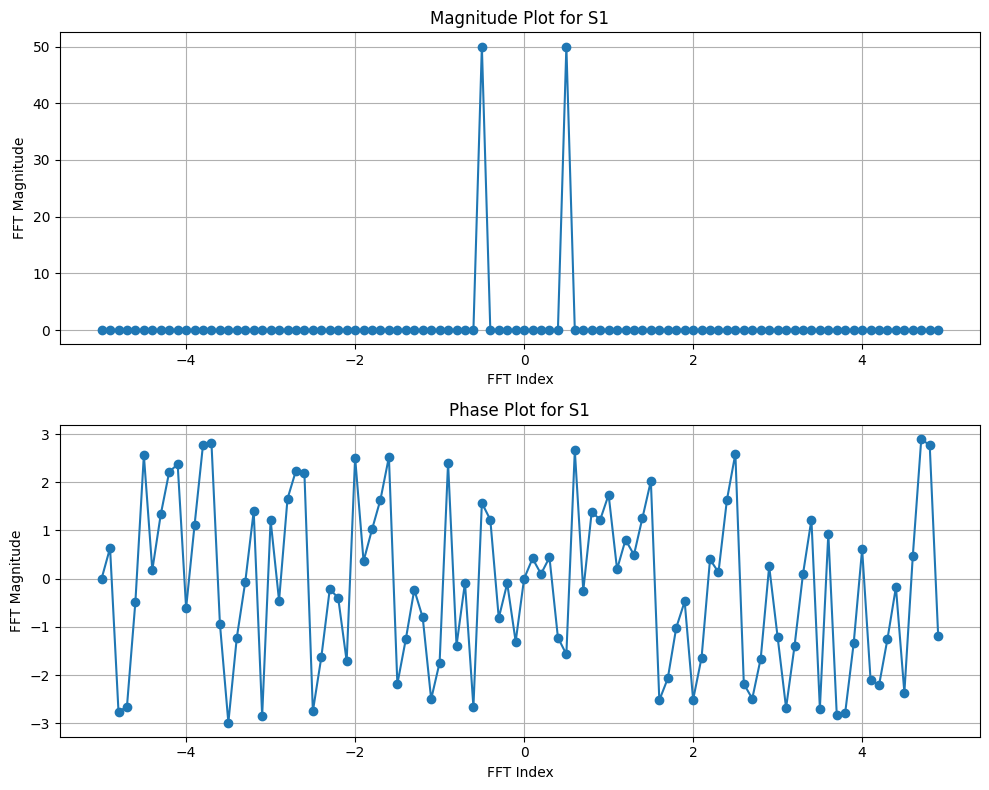

In [29]:
S1 = np.fft.fftshift(np.fft.fft(s1)) # Discrete Fourier Transform and does shifting to put 0Hz freq at center
S1_mag = np.abs(S1)
S1_phase = np.angle(S1)
f = np.arange(Fs1/-2,Fs1/2,Fs1/N)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(f,S1_mag,marker='o')
plt.title("Magnitude Plot for S1")
plt.ylabel("FFT Magnitude")
plt.xlabel("FFT Index")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f,S1_phase,marker='o')
plt.title("Phase Plot for S1")
plt.ylabel("FFT Magnitude")
plt.xlabel("FFT Index")
plt.grid(True)

plt.tight_layout()
plt.show()

### Windowing
Prevents sudden transition between first and last sample to prevent many frequencies to pop up. For 100 samples we want x[0] and x[99] to be equal or close in value(cyclic property). This is done through windowing that multiply the slice of a signal by a window function which tapers to zero on the both ends ensuring signal begin and end at zero. Common windowing functions include Hamming, Hanning, Blackman and Kaiser.

### Spectogram

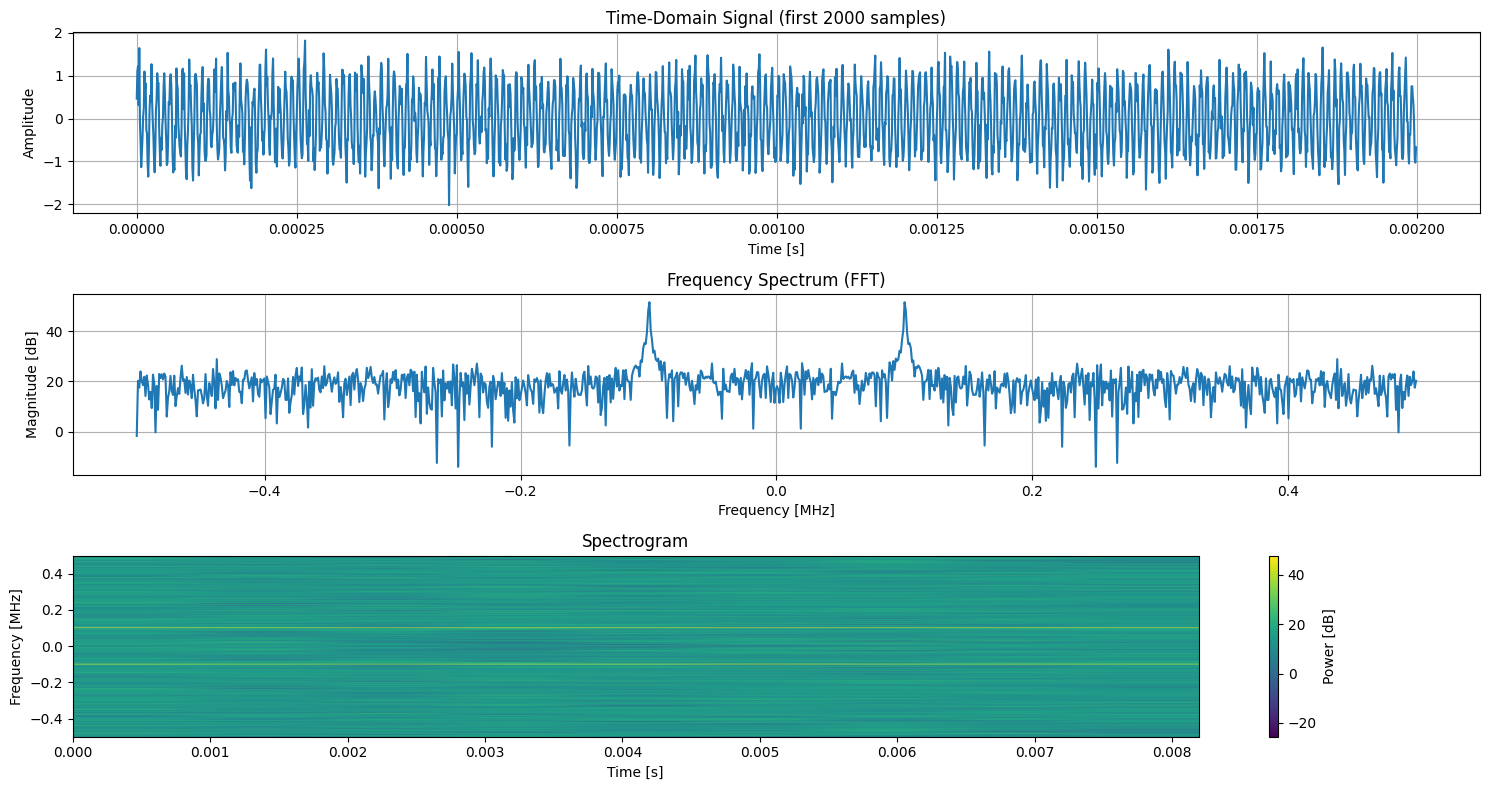

In [40]:
sample_rate = 1e6  # 1 MHz sampling rate
fft_size = 1024
duration = 0.01  # 10 ms total duration

t = np.arange(0, duration, 1 / sample_rate)
f_signal = 100e3
x = np.sin(2 * np.pi * f_signal * t) + 0.3 * np.random.randn(len(t))

# time-domain signal
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(t[:2000], x[:2000])
plt.title("Time-Domain Signal (first 2000 samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Frequency-domain (FFT)
X = np.fft.fftshift(np.fft.fft(x, fft_size))
f_axis = np.linspace(-sample_rate/2, sample_rate/2, fft_size) / 1e6
X_mag = 20 * np.log10(np.abs(X) + 1e-12)

plt.subplot(3, 1, 2)
plt.plot(f_axis, X_mag)
plt.title("Frequency Spectrum (FFT)")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)

# Plot 3: Spectrogram
num_frames = len(x) // fft_size
spectrogram = np.zeros((num_frames, fft_size))
window = np.hamming(fft_size)

for i in range(num_frames):
    segment = x[i * fft_size : (i + 1) * fft_size]
    windowed = segment * window
    fft_result = np.fft.fftshift(np.fft.fft(windowed, fft_size))
    power = np.abs(fft_result) ** 2
    spectrogram[i, :] = 10 * np.log10(power + 1e-12)

t_axis = np.arange(num_frames) * fft_size / sample_rate

plt.subplot(3, 1, 3)
plt.imshow(
    spectrogram.T,
    aspect='auto',
    extent=[t_axis[0], t_axis[-1], f_axis[0], f_axis[-1]],
    origin='lower',
    cmap='viridis'
)
plt.title("Spectrogram")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [MHz]")
plt.colorbar(label="Power [dB]")

plt.tight_layout()
plt.show()
